## **Import libraries and load data**

In [1]:
!pip install gdown

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [3]:
!gdown 1PGQ1Epp-AJG2BRminvyMC8iPVd_1L0Eh

Downloading...
From: https://drive.google.com/uc?id=1PGQ1Epp-AJG2BRminvyMC8iPVd_1L0Eh
To: /content/churn_prediction.xlsx
100% 494k/494k [00:00<00:00, 9.74MB/s]


In [4]:
df = pd.read_excel(r"churn_prediction.xlsx")

## **Q1. Exploratory Data Analysis (EDA)**
- Churned users are mostly new users → Strengthen early-stage user engagement.
- Churned users receive lower cashback incentives → Use targeted and personalized cashback to improve retention.
- Churned users have more complaints → Treat complaints as high-priority churn risks.
- Churned users tend to live farther from warehouses → Mitigate logistics friction through delivery support.
- Churned users gradually stop ordering before fully leaving → Proactively re-engage inactive users.

### **1.1 Data Preprocessing**

#### **Data Overview**

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [6]:
print(df.shape)
df.info()

(5630, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberO

#### **Missing Values**

In [7]:
# Check missing values
missing_rows_percentage = df.isna().sum() / len(df) * 100
print(missing_rows_percentage)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64


→ There are missing values in Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [8]:
# Replace missing values with median
cols_fill_median = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder'
]

for col in cols_fill_median:
    df[col] = df[col].fillna(df[col].median())

# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### **Duplicated Values**

In [9]:
# Check duplicated values
df.duplicated().sum()

np.int64(0)

→ There are no duplicated values.

#### **Same Meaning Values**

In [10]:
# Unique values
list_obj = df.loc[:, df.dtypes == object].columns.tolist()
for j in list_obj:
    print(f"Unique values of {j}:")
    print(df[j].unique())
    print()

Unique values of PreferredLoginDevice:
['Mobile Phone' 'Computer' 'Phone']

Unique values of PreferredPaymentMode:
['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card' 'COD' 'CC']

Unique values of Gender:
['Female' 'Male']

Unique values of PreferedOrderCat:
['Fashion' 'Laptop & Accessory' 'Mobile Phone' 'Grocery' 'Mobile' 'Others']

Unique values of MaritalStatus:
['Married' 'Single' 'Divorced']



In [11]:
# Replace the same meaning values
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC':'Credit Card','COD':'Cash on Delivery'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile Phone', 'Phone')

# Recheck
for j in list_obj:
    print(f"Unique values of {j}:")
    print(df[j].unique())
    print()

Unique values of PreferredLoginDevice:
['Phone' 'Computer']

Unique values of PreferredPaymentMode:
['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card']

Unique values of Gender:
['Female' 'Male']

Unique values of PreferedOrderCat:
['Fashion' 'Laptop & Accessory' 'Phone' 'Grocery' 'Mobile' 'Others']

Unique values of MaritalStatus:
['Married' 'Single' 'Divorced']



### **1.2 Feature Engineering**

In [12]:
# Encoding
df.drop(['CustomerID'], axis=1, inplace=True)
list_encode_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
df_encoded = pd.get_dummies(df, columns=list_encode_columns, drop_first=True )
df_encoded.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Married,MaritalStatus_Single
0,0,20.0,3,7.0,4.0,4,5,3,0,26.0,...,True,False,False,False,False,False,False,False,True,False
1,0,13.0,1,9.0,4.0,4,3,2,0,26.0,...,False,False,False,False,False,False,False,False,False,True
2,0,16.0,3,7.0,3.0,4,3,3,0,26.0,...,False,False,True,False,True,False,False,False,False,False
3,0,5.0,1,16.0,3.0,4,4,3,0,26.0,...,False,False,True,False,False,False,False,False,True,False
4,0,9.0,1,28.0,3.0,4,2,3,1,26.0,...,False,False,False,False,True,False,False,False,False,False


In [13]:
df_encoded.shape

(5630, 27)

### **1.3 Apply base Random Forest model**

#### **Split train/test set**

In [14]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop('Churn', axis = 1)
y = df_encoded[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 3941
Number data of test set: 1689


#### **Normalization**

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### **Apply Random Forest Model**

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=100)

clf_rand.fit(x_train_scaled, y_train)
y_ranf_pre_train = clf_rand.predict(x_train_scaled)
y_ranf_pre_test = clf_rand.predict(x_test_scaled)

#### **Model Evaluation**

In [17]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, recall_score

print(f'Training Balanced Accuracy: {balanced_accuracy_score(y_train, y_ranf_pre_train)}')
print(f'Test Balanced Accuracy: {balanced_accuracy_score(y_test, y_ranf_pre_test)}')
print(f'\nTraining Recall: {recall_score(y_train, y_ranf_pre_train)}')
print(f'Test Recall: {recall_score(y_train, y_ranf_pre_train)}')

Training Balanced Accuracy: 0.9984520123839009
Test Balanced Accuracy: 0.8590447246666062

Training Recall: 0.9969040247678018
Test Recall: 0.9969040247678018


### **1.4 Analyse Top 5 Features from Random Forest model**

#### **Show Feature Importance**

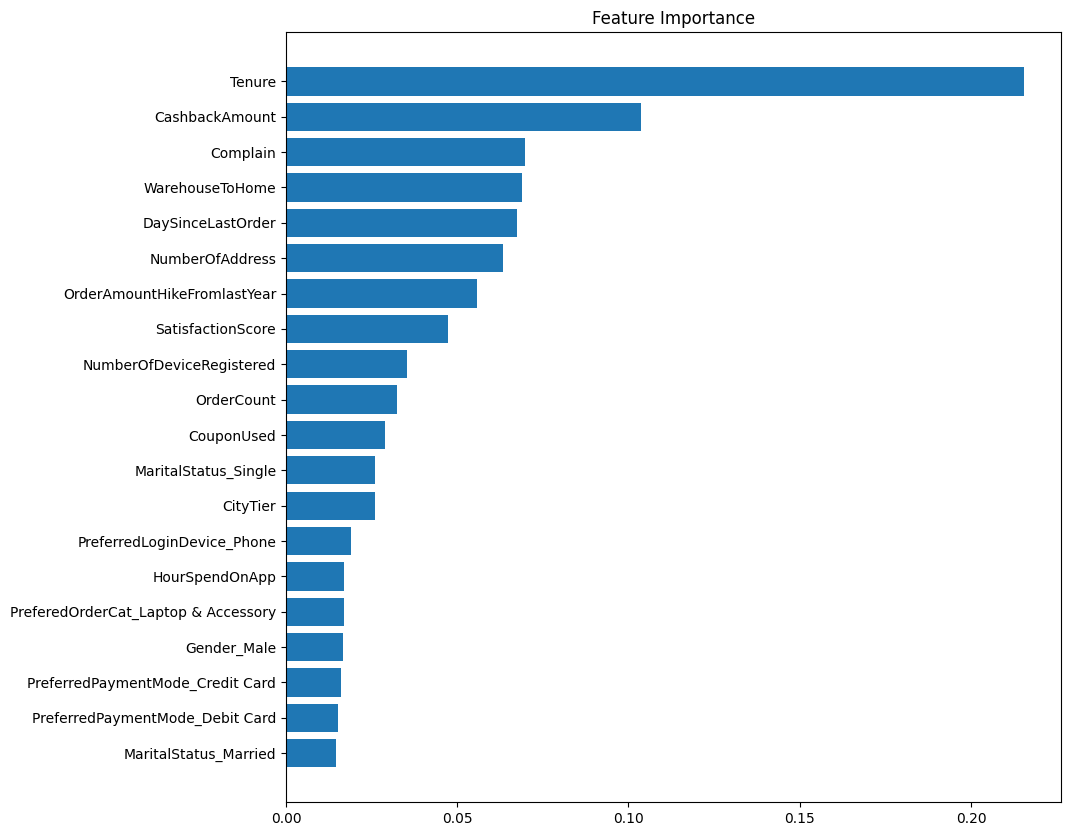

In [18]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, clf_rand.feature_importances_):
    feats[feature] = importance # add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Importance')

# Show plot
plt.show()

#### **Analyse top features**

**1. Tenure**

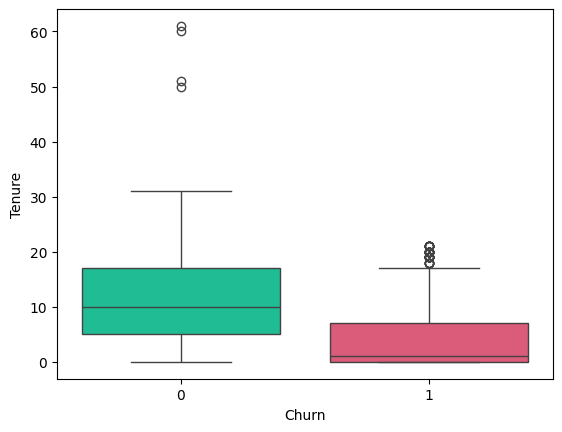

In [19]:
sns.boxplot(data = df, x=df["Churn"], y=df["Tenure"], palette={'0':"#06d6a0",'1':"#ef476f"})
plt.show()

- **Non-churned users** have **significantly longer tenure** and a much wider distribution, indicating long-term engagement.
- **Churned users** are heavily concentrated at very **low tenure**, with a median close to 0–2.

→  Churned users are mostly **new users** who leave before building habits or realizing value.

**2. Cashback Amount**

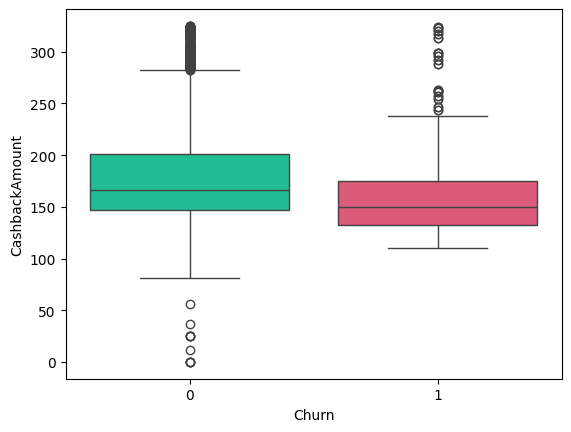

In [20]:
sns.boxplot(data = df, x=df["Churn"], y=df["CashbackAmount"], palette={'0':"#06d6a0",'1':"#ef476f"})
plt.show()

- **Non-churned users** have a higher median cashback and a wider upper range. This indicates they tend to receive more cashback benefits overall.
- **Churned users** have a lower median cashback and a more compressed distribution, suggesting they generally receive fewer incentives.

→ Higher cashback exposure is associated with better user retention. Users who receive less cashback are more likely to churn, suggesting that insufficient or poorly targeted incentives may contribute to disengagement and eventual churn.

**3. Complain**

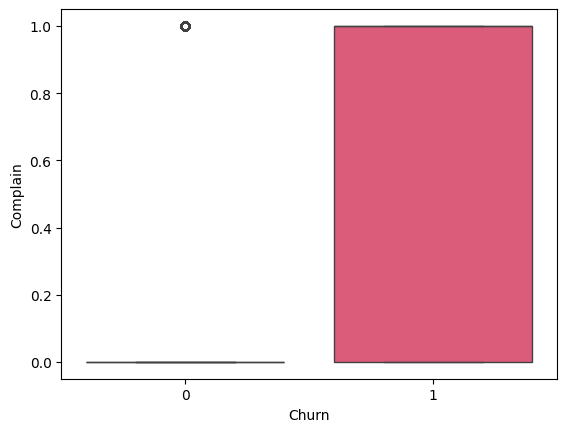

In [21]:
sns.boxplot(data = df, x=df["Churn"], y=df["Complain"], palette={'0':"#06d6a0",'1':"#ef476f"})
plt.show()

- **Non-churned users** rarely complain.
- **Churned users** almost always have complain.

→ A complaint is a strong churn signal. Once an user complains and the issue is not handled well, churn becomes highly likely.

**4. Warehouse To Home**

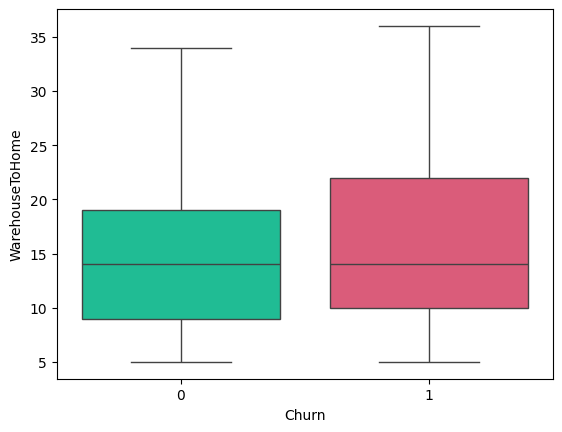

In [22]:
sns.boxplot(data = df, x=df["Churn"], y=df["WarehouseToHome"], palette={'0':"#06d6a0",'1':"#ef476f"}, showfliers=False)
plt.show()

- **Churned users** show a higher median distance from warehouse to home and a wider spread compared to non-churned users.
- **Non-churned users** are generally located closer to warehouses, with distances more tightly clustered.

→ Longer warehouse-to-home distances are associated with higher churn risk. This suggests that logistics-related friction—such as longer delivery times or higher shipping costs—likely contributes to user dissatisfaction and eventual churn.

**5. Day Since Last Order**

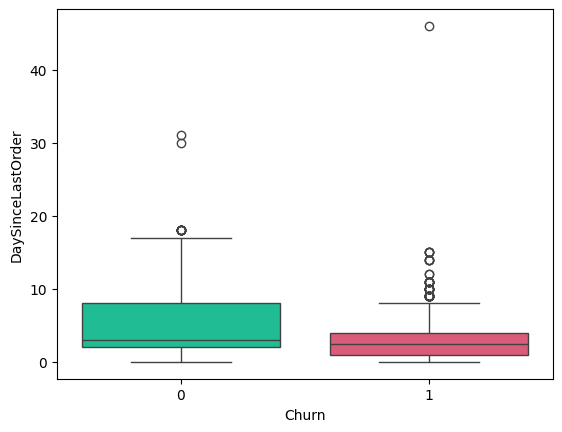

In [23]:
sns.boxplot(data = df, x=df["Churn"], y=df["DaySinceLastOrder"], palette={'0':"#06d6a0",'1':"#ef476f"})
plt.show()

- **Churned users** show **longer gaps or complete inactivity** in recent ordering behavior, with extreme outliers indicating users who stopped ordering entirely.
- **Non-churned users** place orders more consistently with shorter, stable gaps.

→ A **break in purchasing** behavior is a clear precursor to churn.

### **1.5 Insights & Recommendations**

**Behavioral Profile of Churned Users**
1. Mostly new users with short tenure
2. Receive lower cashback benefits and fewer incentives
3. Have more complaints
4. Live farther from warehouses, facing longer delivery distances
5. Gradually stop ordering before fully leaving

**Recommendations to Reduce Churn**
1. **Strengthen early-stage user engagement (first 1–3 months):**
Improve onboarding, provide clear usage guidance, and offer incentives for first and second purchases.

2. **Use targeted cashback as a retention lever:**
Increase or personalize cashback for users with declining activity or low cumulative cashback to reinforce purchasing motivation.

3. **Treat complaints as high-priority churn risks:**
Flag users who complain, respond quickly, and offer personalized compensation or recovery actions.

4. **Mitigate logistics-related churn risks:**
For users located far from warehouses, offer delivery fee subsidies, faster shipping options, or set clearer delivery-time expectations to reduce friction.

5. **Proactively re-engage inactive users:**
Monitor days since last order and trigger reminders, personalized offers, or product recommendations before users disengage completely.

## **Q2. Supervised Learning - Churn Prediction**
- Baseline Model: Random Forest - Balanced Accuracy =  0.87 | Recall = 0.75
- Final Model: Random Forest
  - Balanced Accuracy = 0.89 | Recall = 0.80
  - Best Parameters: bootstrap = False, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200

### **2.1 Baseline Model**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ]),
    "DecisionTree": DecisionTreeClassifier(max_depth=5),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
}

results = []

for name, model in models.items():
    model.fit(x_train_scaled, y_train)

    y_pred = model.predict(x_test_scaled)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        "model": name,
        "precision": precision,
        "recall": recall,
        "balanced_accuracy": bal_acc
    })

results_df = pd.DataFrame(results).sort_values(
    "balanced_accuracy", ascending=False
)

print(results_df)

                model  precision    recall  balanced_accuracy
2        RandomForest   0.923077  0.754967           0.870634
3    GradientBoosting   0.803653  0.582781           0.775890
0  LogisticRegression   0.748792  0.513245           0.737877
1        DecisionTree   0.801242  0.427152           0.702040


→ Choose **Random Forest** as baseline model

### **2.2 Hyperparameter Tuning**

In [25]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [26]:
# Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best parameters
rf_grid = GridSearchCV(
    rf,
    param_grid,
    scoring='balanced_accuracy',
    cv=cv
)

# Fit the model
start_time = time.time()
rf_grid.fit(x_train_scaled, y_train)
rf_time = time.time() - start_time

# Print the best parameters
print("Best Parameters: ", rf_grid.best_params_)
print("Balanced Accuracy:", rf_grid.best_score_)

Best Parameters:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Balanced Accuracy: 0.8980785925441322


### **2.3 Model Evaluation**

In [27]:
best_model = rf_grid.best_estimator_

y_test_pred = best_model.predict(x_test_scaled)

print("Test Balanced Accuracy:", balanced_accuracy_score(y_test, y_test_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))

Test Balanced Accuracy: 0.8978451753988073
Test Recall: 0.8079470198675497


# **Q3. Unsupervised Learning - Churn Segmentation**
1. Low-value users who churn quickly → Minimal incentives, automated vouchers, accept churn.
2. Mobile-focused users with clear intent → Mobile-specific and personalized promotions.
3. High-value users inactive for a long time → Strong reactivation or stop investment.
4. Multi-category users lacking personalization → Cross-category and recommendation-driven offers.

In [28]:
df_churn =df[df['Churn'] == 1]
df_churn.drop(columns=['Churn'], inplace=True)
df_churn.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
24,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59
40,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59
58,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
68,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74


### **3.1 Feature Engineering**

#### **Encoding**

In [29]:
df_encoded_churn = df_encoded[df_encoded['Churn'] == 1]
df_encoded_churn = df_encoded_churn.drop(columns=['Churn'])
df_encoded_churn.shape

(948, 26)

#### **Dimension Reduction**

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_encoded_churn)
PCA_ds = pd.DataFrame(pca.transform(df_encoded_churn), columns=(["col1","col2", "col3"]))
PCA_ds

,col1,col2,col3
0,-17.037051,1.491277,-2.463744
1,-17.055554,1.507643,-2.476759
2,-41.780412,0.194869,6.368293
3,-41.798915,0.211235,6.355277
4,25.185600,-2.153106,-4.598739
...,...,...,...
943,157.959584,-11.593114,10.387705
944,152.849025,-10.168047,-2.463663
945,160.380913,-0.169195,-5.241005
946,157.996590,-11.625846,10.413736


In [31]:
pca.explained_variance_ratio_

array([0.91241607, 0.04239377, 0.01706041])

### **3.2 Apply K Means Model**

#### **Choosing K**

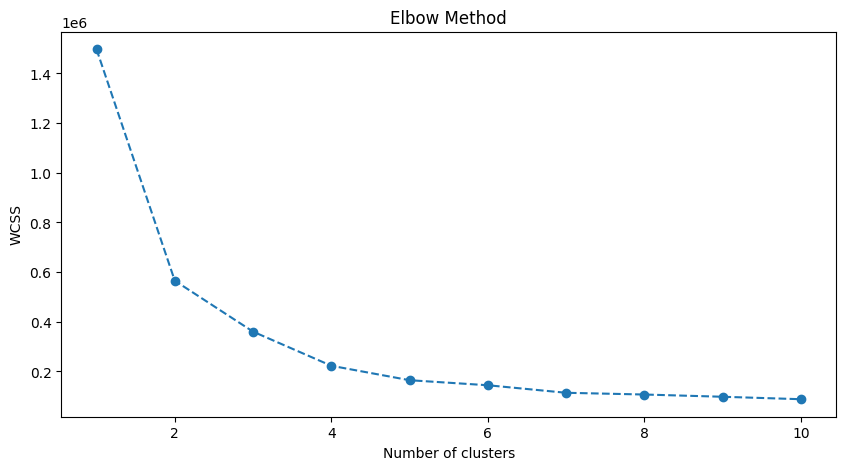

In [32]:
from sklearn.cluster import KMeans

ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_ds)
    # Inertia method returns WCSS for that model
    ss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

→ Choose **k = 4**.

#### **Apply K-Means**

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(PCA_ds)

PCA_ds['clusters']=predicted_labels
df_churn['clusters']=predicted_labels

In [34]:
df_churn

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,clusters
7,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59,2
24,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59,2
40,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59,1
58,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59,1
68,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,21.0,Phone,1,9.0,Debit Card,Male,3.0,4,Others,4,Single,9,1,15.0,6.0,14.0,9.0,317.46,0
5494,9.0,Phone,3,9.0,E wallet,Female,4.0,6,Others,4,Single,4,1,15.0,1.0,2.0,12.0,313.24,0
5531,5.0,Phone,1,19.0,Cash on Delivery,Female,3.0,4,Others,3,Married,3,0,15.0,2.0,16.0,9.0,320.45,0
5571,21.0,Phone,1,9.0,Debit Card,Male,3.0,4,Others,4,Single,9,1,15.0,8.0,14.0,9.0,317.46,0


### **3.3 Model Evaluation**

#### **Silhouette Score**

In [35]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(PCA_ds, predicted_labels)
print(sil_score)

0.45709257474083187


#### **Apply Random Forest Model**

In [36]:
df_encoded_churn['clusters'] = predicted_labels

X = df_encoded_churn.drop(columns={'clusters'})
y = df_encoded_churn['clusters']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

from sklearn.ensemble import RandomForestClassifier

clf_rand_churn = RandomForestClassifier(max_depth=15, random_state=0, n_estimators = 100, class_weight='balanced')

clf_rand_churn.fit(x_train, y_train)
y_pre_train = clf_rand_churn.predict(x_test) # Predict back on train to check overfit
balanced_accuracy_val = balanced_accuracy_score(y_test, y_pre_train)

print(balanced_accuracy_val)

0.9666666666666667


#### **Show Feature Importance**

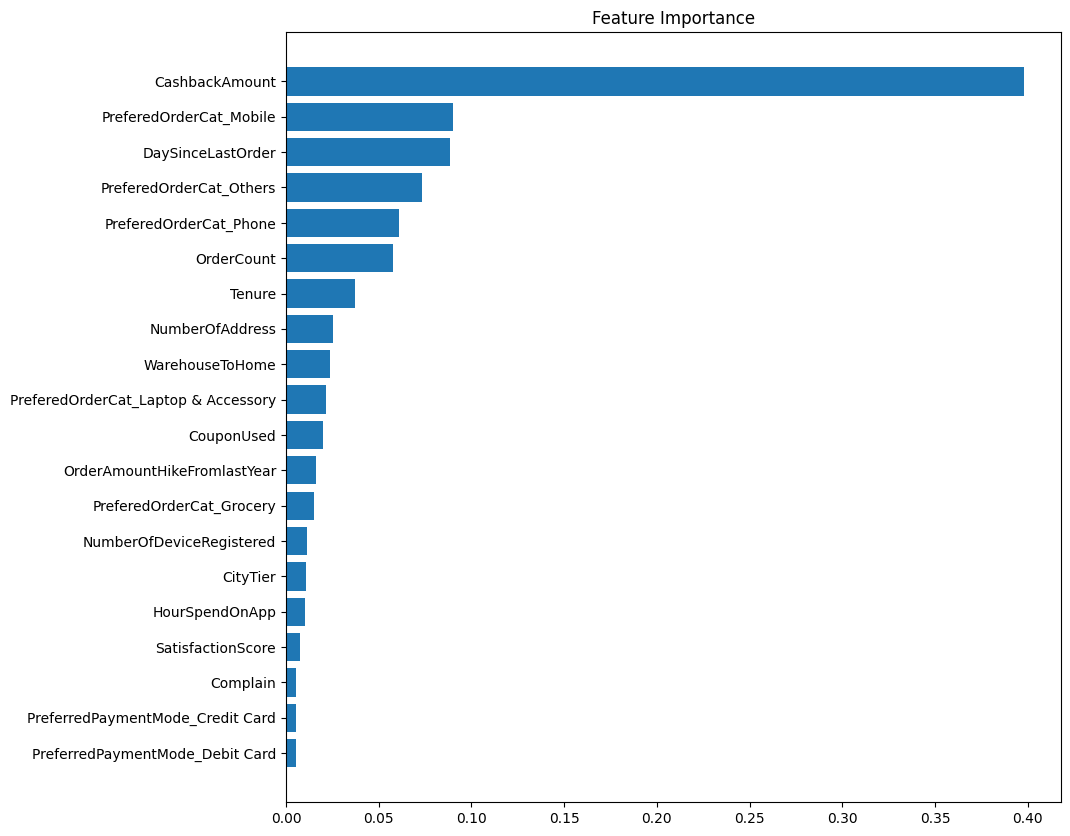

In [37]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, clf_rand_churn.feature_importances_):
    feats[feature] = importance # add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Importance')

# Show plot
plt.show()

#### **EDA top features**

**1. Cashback Amount**

In [38]:
df_cashbackamt = df_churn.groupby('clusters').agg({"CashbackAmount":"sum"}).reset_index()
df_cashbackamt

,clusters,CashbackAmount
0,0,8736.62
1,1,38409.54
2,2,69453.96
3,3,35431.52


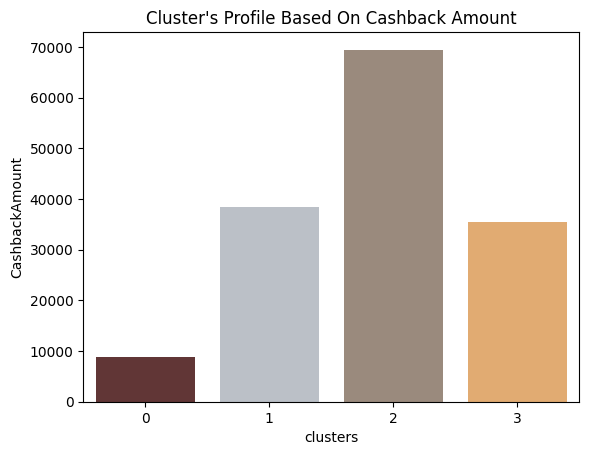

In [39]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.barplot(data = df_cashbackamt, y=df_cashbackamt["CashbackAmount"], x=df_cashbackamt["clusters"], palette=pal)
pl.set_title("Cluster's Profile Based On Cashback Amount")
plt.show()

- Cluster 2 shows the highest cashback amount.
- Cluster 0 receives significantly lower cashback.

→ High cashback does not guarantee retention, as the highest-incentive cluster still churns.

**2. Preferred Order Category**

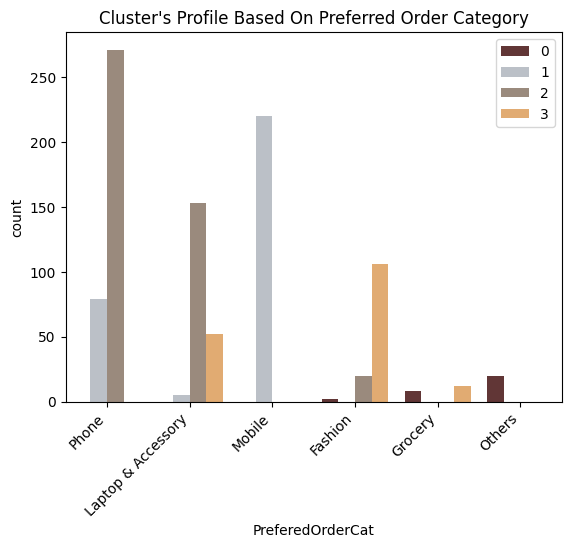

In [40]:
pl = sns.countplot(data = df_churn, x=df_churn["PreferedOrderCat"], hue=df_churn["clusters"], palette=pal)
pl.set_title("Cluster's Profile Based On Preferred Order Category")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- Clear differences in purchasing behavior are observed across clusters.
- Cluster 1 is strongly mobile-focused, Cluster 2 mainly purchases phones and laptops, while Cluster 3 shows more diversified shopping patterns across multiple categories.

→ Each cluster exhibits distinct category preferences, indicating different purchasing behaviors among churned users.

**3. Day Since Last Order**

In [41]:
df_dslo = df_churn.groupby('clusters').agg({"DaySinceLastOrder":"sum"}).reset_index()
df_dslo

,clusters,DaySinceLastOrder
0,0,258.0
1,1,546.0
2,2,1464.0
3,3,787.0


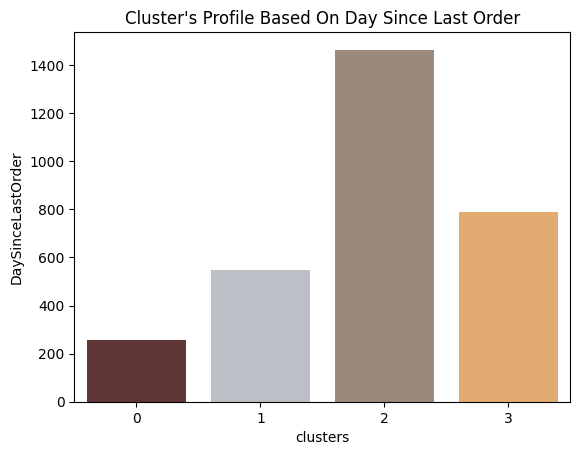

In [42]:
pl = sns.barplot(data = df_dslo, y=df_dslo["DaySinceLastOrder"], x=df_dslo["clusters"], palette=pal)
pl.set_title("Cluster's Profile Based On Day Since Last Order")
plt.show()

- Cluster 2 has the longest inactivity period, suggesting permanent or long-term churn.
- In contrast, Cluster 0 churns shortly after their last purchase, indicating early disengagement.

→ Longer inactivity is strongly associated with certain churn clusters.

#### **Distribution of Clusters**

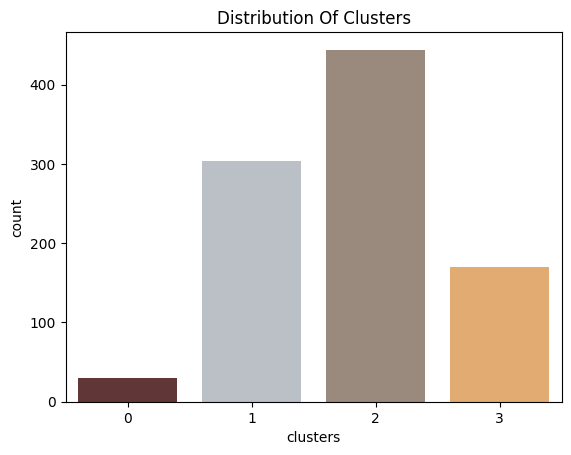

In [43]:
pl = sns.countplot(x=df_churn["clusters"], palette=pal)
pl.set_title("Distribution Of Clusters")
plt.show()

- Churned users are unevenly distributed across clusters.
- Cluster 2 and Cluster 1 accounting for the majority.

→ Most churned users are previously active or high-value customers rather than early, low-engagement users.

### **3.4 Insights & Recommendations**

**Cluster 0 – Low-value early churned users**

- **Insights:**
Users in this cluster receive very low cashback and churn shortly after their last purchase. The cluster size is relatively small, and purchasing behavior is scattered across different categories, indicating weak engagement and low overall customer value. These users appear to disengage quickly without forming strong usage habits.

- **Recommendations:**
Heavy retention investment is not recommended for this group. The company may apply low-cost, automated win-back strategies such as small, time-limited vouchers or reminder notifications. From a business standpoint, accepting churn from this segment is reasonable.

**Cluster 1 – Mobile-focused churned users**

- **Insights:**
This cluster shows a strong preference for the Mobile category, with moderate cashback levels and a medium time since last order. Despite having a clear purchasing intent, these users still churn, suggesting that their expectations regarding product experience, pricing, or category-specific offerings may not have been fully met.

- **Recommendations:**
Targeted promotions focused on the Mobile category are recommended, such as device bundles, accessory discounts, or trade-in programs. Personalized, category-specific campaigns are likely to be more effective than generic cashback incentives.

**Cluster 2 – High-value but long-inactive churned users**

- **Insights:**
Cluster 2 is the largest group and consists of users with the highest cashback amounts and the longest inactivity periods. These users primarily purchase high-value products such as phones and laptops. The results indicate that even strong financial incentives are insufficient to retain these users once their purchasing cycle ends or they become disengaged.

- **Recommendations:**
Strong reactivation strategies should be prioritized for this segment, including campaigns around new product launches, upgrade cycles, or VIP comeback offers. If reactivation efforts are unsuccessful, further investment in this group should be reduced to optimize marketing spend.

**Cluster 3 – Multi-category churned users**

- **Insights:**
Users in this cluster exhibit diversified purchasing behavior across multiple product categories, receive moderate cashback, and show relatively long inactivity periods. Their churn behavior is likely driven by a lack of personalization rather than price sensitivity or dissatisfaction with a single category.

- **Recommendations:**
Cross-category promotions, personalized product recommendations, and bundled offers are recommended to increase engagement. Improving personalization may help re-establish relevance and encourage repeat purchases for this segment.